# Implementación

* Sobrepoblación: Si una célula viva es rodeada por más de tres células vivas, muere.
* Estasis: Si una célula viva es rodeada por dos o tres células vivas, sobrevive.
* Subpoblación: Si una célula viva es rodeada por menos de dos células vivas, muere.
* Reproduction: Si una célula muerta es rodeada por exáctamente tres células vivas, esta se vuelve una célula viva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from ipywidgets import interact
from ipywidgets import fixed
import numba
%load_ext line_profiler
%matplotlib inline

In [53]:
#@numba.jit
def search(cells, row, col):
    Nx = cells.shape[0]
    Ny = cells.shape[1]
    alive = 0
    limIzq = limSup = -1
    limDer = limInf = 2
    
    #Condiciones de borde
    if row == 0:
        limIzq = 0
    if col == 0:
        limSup = 0
    if row == Nx-1:
        limDer = 1
    if col == Ny-1:
        limInf = 1

    #Búsqueda en la vecindad de la célula
    for i in range(limIzq,limDer):
        for j in range(limSup,limInf):
            if (i,j) != (0,0):
                if cells[row+i][col+j] == 1:
                    alive+=1;
    return(alive)

In [54]:
def iteration(original, iterations):
    
    #Primera llamada a la función
    if len(solutions) == 0:
        solutions.append(original)
        
    #Último estado    
    newCells = solutions[-1]
    
    #Creación de un espacio sin células
    newGeneration = np.zeros(newCells.shape, dtype=np.int)
    
    #Si no se ha realizado la iteración
    if len(solutions) <= iterations:
        for k in range(len(solutions)-1, iterations):
            for i in range(0, newCells.shape[0]):
                for j in range(0, newCells.shape[1]):
                    q = search(newCells, i, j)
                    if newCells[i][j] == 1:
                        if q > 3:
                            newGeneration[i][j] = 0
                        elif q < 2:
                            newGeneration[i][j] = 0
                        else:
                            newGeneration[i][j] = 1
                    else:
                        if q == 3:
                            newGeneration[i][j] = 1
            solutions.append(newGeneration)
            newCells = solutions[-1]
            newGeneration = np.zeros(newCells.shape, dtype=np.int)
        return(newCells)
    
    #Si la iteración ya fue realizada anteriormente
    else:
        return solutions[iterations]


# Profiling

In [34]:
N = 500
cells = np.random.randint(2, size =(N,N))

In [35]:
%%timeit
solutions = []
iteration(cells, 1)

1000 loops, best of 3: 430 µs per loop


In [36]:
%%timeit
solutions = []
iteration(cells, 10)

1000 loops, best of 3: 474 µs per loop


In [37]:
%%timeit
solutions = []
iteration(cells, 100)

The slowest run took 93884.60 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 442 µs per loop


In [57]:
solutions = []

In [58]:
%%prun -s cumulative -q -l 15 -T prun0
iteration(cells, 100)

 
*** Profile printout saved to text file 'prun0'. 


In [59]:
print(open('prun0', 'r').read())

         25000209 function calls in 167.700 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  167.700  167.700 {built-in method builtins.exec}
        1    0.000    0.000  167.700  167.700 <string>:2(<module>)
        1   16.898   16.898  167.700  167.700 <ipython-input-54-f7f9fbc11614>:1(iteration)
 25000000  150.787    0.000  150.787    0.000 <ipython-input-53-b8aa3d259e34>:2(search)
      101    0.014    0.000    0.014    0.000 {built-in method numpy.core.multiarray.zeros}
      101    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


In [62]:
solutions = []

In [63]:
%lprun -T lprof0 -f iteration iteration(cells, 100)

*** KeyboardInterrupt exception caught in code being profiled.
*** Profile printout saved to text file 'lprof0'. *** KeyboardInterrupt exception caught in code being profiled.


In [61]:
print(open('lprof0', 'r').read())

Timer unit: 1e-06 s

Total time: 0.000419 s
File: <ipython-input-54-f7f9fbc11614>
Function: iteration at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def iteration(original, iterations):
     2                                               
     3                                               #Primera llamada a la función
     4         1            9      9.0      2.1      if len(solutions) == 0:
     5                                                   solutions.append(original)
     6                                                   
     7                                               #Último estado    
     8         1            6      6.0      1.4      newCells = solutions[-1]
     9                                               
    10                                               #Creación de un espacio sin células
    11         1          392    392.0     93.6      newGeneration = np.zeros(newCells.sh

La creación de un array de ceros es lo más costoso en las funciones creadas

# Visualización

In [43]:
def visualization(original, it):
    cells = iteration(original, it)
    fig = plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(cells, interpolation=None, cmap='inferno')
    plt.show()

In [44]:
cellsDic = dict()

In [45]:
#Interesting patterns
aux = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0],
                [0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], np.int)
cellsDic["forever"] = aux
cellsDic["pulsar"] = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0],
                               [0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0],
                               [0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], np.int)
aux = np.zeros(shape=(20,20), dtype=int)
aux[1][1] = aux[1][3] = aux[2][2] = aux[2][3] = aux[3][2] = 1

cellsDic["spaceship"] = aux

A continuación, hay un ejemplo donde un número aleatorio de células se encuentran en una caja de 500x500, se puede observar como se comportan en cada iteración que se realiza.

In [46]:
N = 500
cellsDic["random"] = np.random.randint(2, size =(N,N))

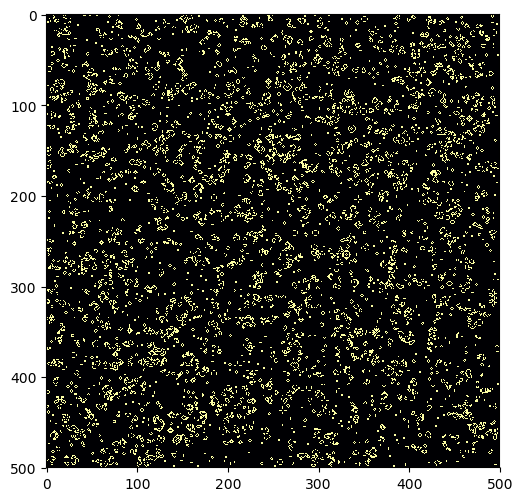

In [50]:
solutions=[]
interact(visualization, original=fixed(cellsDic["random"]), it = (0,100,1))

En un comienzo, se observa que gran parte del espacio se encuentra utilizado por las células, las que rápidamente mueren, posiblemente por sobrepolación, decantando en un estado más estable de interacción.

Existen patrones que son estáticos y que no variarán en el tiempo. Algunos ejemplos son los que se muestran a continuación.

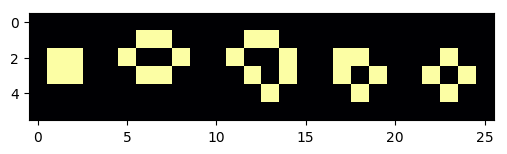

<function __main__.visualization>

In [48]:
solutions=[]
interact(visualization, original=fixed(cellsDic["forever"]), it = (0,100,1))

Además, hay patrones que simulan objetos, como una nave espacial que se mueve en el espacio, patrón que va alternando entre su forma original y otras utilizadas para desplazarse a medida que se mueve en el espacio.

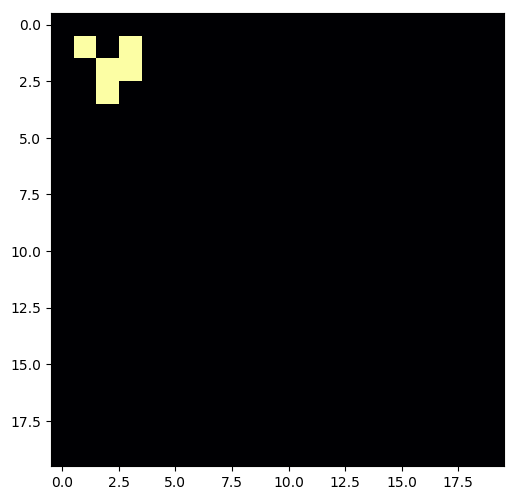

In [49]:
solutions=[]
interact(visualization, original=fixed(cellsDic["spaceship"]), it = (0,100,1))